This notebook contains initial comparisons of the metal diffrac (EDTA +/-) experiment to previous DIFFRAC replicates.

In [3]:
from matplotlib.pyplot import figure, show, cm

import pandas as pd
import numpy as np
import itertools as it
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy import stats
import re
import scipy.cluster.hierarchy as sch

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
mpl.rc('pdf', fonttype=42)
import seaborn as sns

import random

from collections import Counter
import operator

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve

ModuleNotFoundError: No module named 'matplotlib'

In [4]:
#sfisch6: EDTA elut files as pandas dataframes
EDTA_minus_df = pd.read_csv('/stor/project/sfisch6/projects/metal_diffrac/elut_files/reviewed/HEK293_EDTA_minus_SEC_control_20220626.elut', sep="\t", index_col=0)
EDTA_plus_df = pd.read_csv('/stor/project/sfisch6/projects/metal_diffrac/elut_files/reviewed/HEK293_EDTA_plus_SEC_treatment_20220626_trimmed.elut', sep="\t", index_col=0)

NameError: name 'pd' is not defined

In [7]:
#sfisch6: Adding in the phospho diffrac control replicates
phospho_diff_cntrl_1_df = pd.read_csv("/stor/project/sfisch6/diffrac_cntrl_replicates/2019_01_23_HEK_SEC_control.prot_count_mFDRpsm001.group.unique.elut", sep="\t", index_col=0)
phospho_diff_cntrl_2_df = pd.read_csv("/stor/project/sfisch6/diffrac_cntrl_replicates/2019_02_27_HEK_SEC_control.prot_count_mFDRpsm001.group.unique.elut", sep="\t", index_col=0)
phospho_diff_cntrl_3_df = pd.read_csv("/stor/project/sfisch6/diffrac_cntrl_replicates/2019_04_05_HEK_SEC_control.prot_count_mFDRpsm001.group.unique.elut", sep="\t", index_col=0)

In [8]:
#sfisch6: Adding in the alternate replicates to compare to the metal diffrac elut files
RNA_diff_cntrl_1_df = pd.read_csv("/stor/project/sfisch6/projects/fresh_diffrac/urea_elute_files/Hek293_SEC_DIFFRAC_cntl_rep1_20180201.elut", sep="\t", index_col=0)
RNA_diff_cntrl_2_df = pd.read_csv("/stor/project/sfisch6/projects/fresh_diffrac/urea_elute_files/Hek293_SEC_DIFFRAC_cntl_rep2_20190425.elut", sep="\t", index_col=0)

In [9]:
#sfisch6: Also looking at urea diffrac (0M)
urea_0M_df = pd.read_csv("/stor/MS/processed/Fusion_data/Anna/Anna_HEK_urea_SEC_truncated_elut_files/Anna_HEK_urea_SEC_0M_050817_20220314b_trimmed.elut", sep="\t", index_col=0)

In [10]:
#sfisch6: Looking at the different replicates (phospho diffrac control rep 1)
phospho_diff_cntrl_1_df

,TotalCount,HEK_SEC_control_12a_122018,HEK_SEC_control_13a_122018_20190123150029,HEK_SEC_control_14a_122018_20190124045608,HEK_SEC_control_15a_122018,HEK_SEC_control_16a_122018,HEK_SEC_control_17a_122018,HEK_SEC_control_18a_122018,HEK_SEC_control_19a_122018_20190123215814,HEK_SEC_control_20a_122018_20190124115355,...,HEK_SEC_control_61a_122018_20190123200823,HEK_SEC_control_62a_122018_20190124100402,HEK_SEC_control_63a_122018,HEK_SEC_control_64a_122018,HEK_SEC_control_65a_122018,HEK_SEC_control_66a_122018,HEK_SEC_control_67a_122018_20190124030614,HEK_SEC_control_68a_122018_20190124170157,HEK_SEC_control_69a_122018,HEK_SEC_control_70a_122018
#ProtID,,,,,,,,,,,,,,,,,,,,,
A0A087WVF3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A183,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AUZ9,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AV02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AVF1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6X9,5.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6Y0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Q9Y6Y1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#sfisch6: Looking at the different replicates (RNA diffrac control rep 1)
RNA_diff_cntrl_1_df

,Control_HEK_SEC_020118_10b,Control_HEK_SEC_020118_11b,Control_HEK_SEC_020118_12b,Control_HEK_SEC_020118_13b,Control_HEK_SEC_020118_14b,Control_HEK_SEC_020118_15b,Control_HEK_SEC_020118_16b,Control_HEK_SEC_020118_17b,Control_HEK_SEC_020118_18b,Control_HEK_SEC_020118_19b,...,Control_HEK_SEC_020118_61c,Control_HEK_SEC_020118_62b,Control_HEK_SEC_020118_63b,Control_HEK_SEC_020118_64b,Control_HEK_SEC_020118_65b,Control_HEK_SEC_020118_66b,Control_HEK_SEC_020118_67b,Control_HEK_SEC_020118_68b,Control_HEK_SEC_020118_69b,Control_HEK_SEC_020118_70b
A0A087WUL8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A087X1C5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A096LP01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A096LP55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A0B4J2D9,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6X9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6Y0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6Y8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
EDTA_minus_df 

,HEK293_EDTA_minus_SEC_control_12a_20220603,HEK293_EDTA_minus_SEC_control_13a_20220603,HEK293_EDTA_minus_SEC_control_14a_20220603,HEK293_EDTA_minus_SEC_control_15a_20220603,HEK293_EDTA_minus_SEC_control_16a_20220603,HEK293_EDTA_minus_SEC_control_17a_20220603,HEK293_EDTA_minus_SEC_control_18a_20220603,HEK293_EDTA_minus_SEC_control_19a_20220603,HEK293_EDTA_minus_SEC_control_20a_20220603,HEK293_EDTA_minus_SEC_control_21a_20220603,...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
A0A024RBG1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A075B6I1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A075B6I4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A075B6Q5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A075B6S4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Y1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6Y8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Q9Y6Z7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U3KPV4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


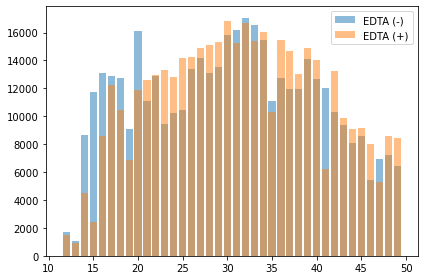

In [13]:
#sfisch6: Comparison of the total PSMs (peptide hits) across SEC fractions between the EDTA control/treatment
plt.bar(range(12,50), EDTA_minus_df.sum(), alpha=0.5, label="EDTA (-)")
plt.bar(range(12, 50), EDTA_plus_df.sum(),  alpha=0.5, label="EDTA (+)")
plt.legend()

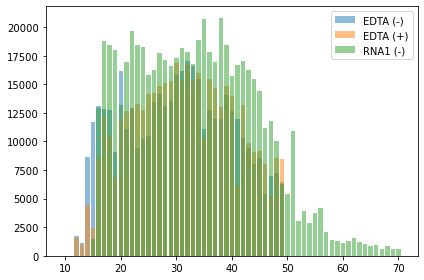

In [14]:
#sfisch6: Comparison of total summed PSMs per fraction b/w the EDTA-, EDTA+, and RNA-
plt.bar(range(12,50), EDTA_minus_df.sum(), alpha=0.5, label="EDTA (-)")
plt.bar(range(12, 50), EDTA_plus_df.sum(),  alpha=0.5, label="EDTA (+)")
plt.bar(range(10, 71), RNA_diff_cntrl_1_df.sum(),  alpha=0.5, label="RNA1 (-)")
plt.legend()

<BarContainer object of 38 artists>

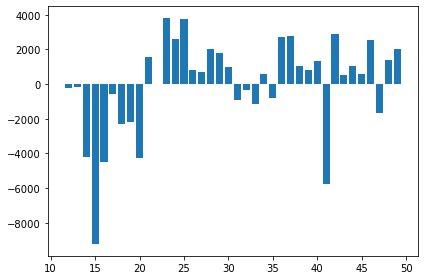

In [15]:
#sfisch6: Looking at which fractions have changed the most when just comparing sums b/w EDTA -/+
plt.bar(range(12, 50), EDTA_plus_df.sum().values - EDTA_minus_df.sum().values)

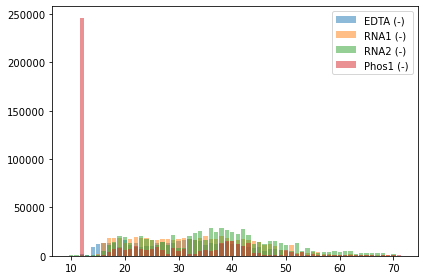

In [16]:
#sfisch6: Looking at a comparison of various control replicates 
plt.bar(range(12,50), EDTA_minus_df.sum().values, alpha=0.5, label="EDTA (-)")
plt.bar(range(10, 71), RNA_diff_cntrl_1_df.sum().values,  alpha=0.5, label="RNA1 (-)")
plt.bar(range(10, 71), RNA_diff_cntrl_2_df.sum().values,  alpha=0.5, label="RNA2 (-)")
plt.bar(range(12, 72), phospho_diff_cntrl_1_df.sum().values,  alpha=0.5, label="Phos1 (-)")
plt.legend()

In [17]:
phospho_diff_cntrl_1_df.sum().values

array([2.45623e+05, 2.15000e+02, 2.42000e+02, 2.92000e+02, 5.16000e+02,
       3.97100e+03, 7.21900e+03, 8.43100e+03, 6.39000e+03, 6.87600e+03,
       9.62900e+03, 6.88600e+03, 6.05500e+03, 7.04500e+03, 9.48700e+03,
       6.35500e+03, 2.23600e+03, 7.73300e+03, 5.03400e+03, 6.64900e+03,
       2.14000e+03, 2.33900e+03, 5.13700e+03, 5.96000e+03, 5.33400e+03,
       5.66400e+03, 1.30020e+04, 1.54430e+04, 1.56790e+04, 1.25250e+04,
       1.04260e+04, 1.28340e+04, 3.03500e+03, 3.25200e+03, 9.73000e+02,
       6.06000e+02, 1.05900e+03, 5.42000e+02, 5.61700e+03, 4.35000e+03,
       2.30500e+03, 4.09800e+03, 9.24000e+02, 1.67500e+03, 7.24000e+02,
       5.75000e+02, 8.06000e+02, 3.85000e+02, 3.51000e+02, 3.63000e+02,
       8.71000e+02, 1.09200e+03, 1.31300e+03, 7.36000e+02, 5.32000e+02,
       5.80000e+01, 4.87000e+02, 4.05000e+02, 3.15000e+02, 4.30000e+02])

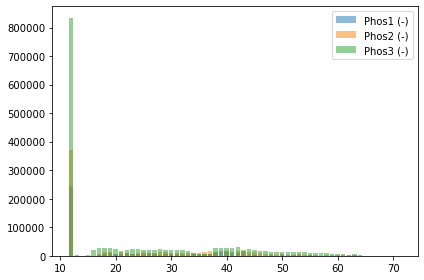

In [18]:
#sfisch6: Comparison of the three phospho DIFFRAC control replicates
plt.bar(range(12, 72), phospho_diff_cntrl_1_df.sum().values,  alpha=0.5, label="Phos1 (-)")
plt.bar(range(12, 63), phospho_diff_cntrl_2_df.sum().values,  alpha=0.5, label="Phos2 (-)")
plt.bar(range(12, 64), phospho_diff_cntrl_3_df.sum().values,  alpha=0.5, label="Phos3 (-)")
plt.legend()

In [19]:
phospho_diff_cntrl_3_df

,TotalCount,HEK_SEC_control_12a_122018_20190330051135,HEK_SEC_control_13a_122018_20190123150029_20190327120728,HEK_SEC_control_14a_122018_20190124045608_20190328004609,HEK_SEC_control_15a_122018_20190328132503,HEK_SEC_control_16a_122018_20190329004656,HEK_SEC_control_17a_122018_20190329120846,HEK_SEC_control_18a_122018_20190329233038,HEK_SEC_control_19a_122018_20190123215814_20190327190514,HEK_SEC_control_20a_122018_20190124115355_20190328074401,...,HEK_SEC_control_53a_122018_20190329155948,HEK_SEC_control_54a_122018_20190330032142,HEK_SEC_control_55a_122018_20190124014913_20190327225614,HEK_SEC_control_56a_122018_20190124154457_20190328113509,HEK_SEC_control_57a_122018_20190328225703,HEK_SEC_control_58a_122018_20190329101854,HEK_SEC_control_59a_122018_20190329214044,HEK_SEC_control_60a_122018_20190330101939,HEK_SEC_control_61a_122018_20190123200823_20190327171524,HEK_SEC_control_62a_122018_20190124100402_20190328055407
#ProtID,,,,,,,,,,,,,,,,,,,,,
A0A087X179,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A183,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
A0AUZ9,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AV02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AV96,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Y1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6Y8,277.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6Y9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
phospho_diff_cntrl_1_df.columns[0]

'TotalCount'

In [21]:
trimmed_phospho1_df = phospho_diff_cntrl_1_df.drop(phospho_diff_cntrl_1_df.columns[0], axis=1)

In [22]:
trimmed_phospho1_df.columns[0]

'HEK_SEC_control_12a_122018'

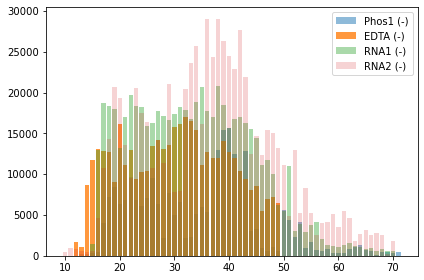

In [23]:
#sfisch6: Looking at control replicates with different layering of bar graphs
plt.bar(range(13, 72), trimmed_phospho1_df.sum().values,  alpha=0.5, label="Phos1 (-)")
plt.bar(range(12,50), EDTA_minus_df.sum().values, alpha=0.8, label="EDTA (-)")
plt.bar(range(10, 71), RNA_diff_cntrl_1_df.sum().values,  alpha=0.4, label="RNA1 (-)")
plt.bar(range(10, 71), RNA_diff_cntrl_2_df.sum().values,  alpha=0.2, label="RNA2 (-)")
plt.legend()

In [24]:
trimmed_phospho1_df

,HEK_SEC_control_12a_122018,HEK_SEC_control_13a_122018_20190123150029,HEK_SEC_control_14a_122018_20190124045608,HEK_SEC_control_15a_122018,HEK_SEC_control_16a_122018,HEK_SEC_control_17a_122018,HEK_SEC_control_18a_122018,HEK_SEC_control_19a_122018_20190123215814,HEK_SEC_control_20a_122018_20190124115355,HEK_SEC_control_21a_122018,...,HEK_SEC_control_61a_122018_20190123200823,HEK_SEC_control_62a_122018_20190124100402,HEK_SEC_control_63a_122018,HEK_SEC_control_64a_122018,HEK_SEC_control_65a_122018,HEK_SEC_control_66a_122018,HEK_SEC_control_67a_122018_20190124030614,HEK_SEC_control_68a_122018_20190124170157,HEK_SEC_control_69a_122018,HEK_SEC_control_70a_122018
#ProtID,,,,,,,,,,,,,,,,,,,,,
A0A087WVF3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AUZ9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AV02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AVF1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6X9,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6Y0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Q9Y6Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
EDTA_minus_df.sum().values

array([ 1739.,  1085.,  8660., 11704., 13064., 12849., 12741.,  9055.,
       16122., 11065., 12911.,  9462., 10215., 10443., 13413., 14171.,
       13086., 13544., 15819., 16202., 17021., 16557., 15450., 11122.,
       12764., 11925., 11972., 14083., 12675., 11991., 10329.,  9396.,
        8059.,  8595.,  5437.,  6957.,  7199.,  6438.])

In [26]:
#sfisch6: Number of proteins with rowsums greater than 1 psm 
EDTA_minus_df[EDTA_minus_df.sum(axis=1)>1]

,HEK293_EDTA_minus_SEC_control_12a_20220603,HEK293_EDTA_minus_SEC_control_13a_20220603,HEK293_EDTA_minus_SEC_control_14a_20220603,HEK293_EDTA_minus_SEC_control_15a_20220603,HEK293_EDTA_minus_SEC_control_16a_20220603,HEK293_EDTA_minus_SEC_control_17a_20220603,HEK293_EDTA_minus_SEC_control_18a_20220603,HEK293_EDTA_minus_SEC_control_19a_20220603,HEK293_EDTA_minus_SEC_control_20a_20220603,HEK293_EDTA_minus_SEC_control_21a_20220603,...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
A0A024RBG1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A075B6S4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
A0A075B6T7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
A0A0A0MRZ9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
A0A0B4J1U7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6X6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6X9,0.0,0.0,0.0,3.0,3.0,2.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6Y8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Q9Y6Z7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#sfisch6: Number of proteins with rowsums > than 10 psm 
EDTA_minus_df[EDTA_minus_df.sum(axis=1)>=10]

,HEK293_EDTA_minus_SEC_control_12a_20220603,HEK293_EDTA_minus_SEC_control_13a_20220603,HEK293_EDTA_minus_SEC_control_14a_20220603,HEK293_EDTA_minus_SEC_control_15a_20220603,HEK293_EDTA_minus_SEC_control_16a_20220603,HEK293_EDTA_minus_SEC_control_17a_20220603,HEK293_EDTA_minus_SEC_control_18a_20220603,HEK293_EDTA_minus_SEC_control_19a_20220603,HEK293_EDTA_minus_SEC_control_20a_20220603,HEK293_EDTA_minus_SEC_control_21a_20220603,...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
A0A0B4J2D5,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,...,14.0,66.0,14.0,7.0,3.0,4.0,3.0,2.0,6.0,2.0
A0A0U1RRE5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,16.0,13.0,5.0,5.0,5.0,1.0,0.0
A0A0U1RRL7,0.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A1B0GV03,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0
A0A286YEY9,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6V0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
Q9Y6W5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6X4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6X9,0.0,0.0,0.0,3.0,3.0,2.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
EDTA_plus_df[EDTA_plus_df.sum(axis=1) > 1]

,HEK293_EDTA_plus_SEC_treatment_12a_20220603,HEK293_EDTA_plus_SEC_treatment_13a_20220603,HEK293_EDTA_plus_SEC_treatment_14a_20220603,HEK293_EDTA_plus_SEC_treatment_15a_20220603,HEK293_EDTA_plus_SEC_treatment_16a_20220603,HEK293_EDTA_plus_SEC_treatment_17a_20220603,HEK293_EDTA_plus_SEC_treatment_18a_20220603,HEK293_EDTA_plus_SEC_treatment_19a_20220603,HEK293_EDTA_plus_SEC_treatment_20a_20220603,HEK293_EDTA_plus_SEC_treatment_21a_20220603,...,HEK293_EDTA_plus_SEC_treatment_41a_20220603,HEK293_EDTA_plus_SEC_treatment_42a_20220603,HEK293_EDTA_plus_SEC_treatment_43a_20220603,HEK293_EDTA_plus_SEC_treatment_44a_20220603,HEK293_EDTA_plus_SEC_treatment_45a_20220603,HEK293_EDTA_plus_SEC_treatment_46a_20220603,HEK293_EDTA_plus_SEC_treatment_47a_20220603,HEK293_EDTA_plus_SEC_treatment_48a_20220603,HEK293_EDTA_plus_SEC_treatment_49a_20220603,HEK293_EDTA_plus_SEC_treatment_50a_20220603
A0A087X0K7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A096LP49,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A096LPK9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A0B4J1U7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0
A0A0B4J2D5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,52.0,0.0,...,4.0,6.0,36.0,7.0,11.0,6.0,3.0,6.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6X6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6X8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6X9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6Y0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
EDTA_plus_df[EDTA_plus_df.sum(axis=1) >= 10]

,HEK293_EDTA_plus_SEC_treatment_12a_20220603,HEK293_EDTA_plus_SEC_treatment_13a_20220603,HEK293_EDTA_plus_SEC_treatment_14a_20220603,HEK293_EDTA_plus_SEC_treatment_15a_20220603,HEK293_EDTA_plus_SEC_treatment_16a_20220603,HEK293_EDTA_plus_SEC_treatment_17a_20220603,HEK293_EDTA_plus_SEC_treatment_18a_20220603,HEK293_EDTA_plus_SEC_treatment_19a_20220603,HEK293_EDTA_plus_SEC_treatment_20a_20220603,HEK293_EDTA_plus_SEC_treatment_21a_20220603,...,HEK293_EDTA_plus_SEC_treatment_41a_20220603,HEK293_EDTA_plus_SEC_treatment_42a_20220603,HEK293_EDTA_plus_SEC_treatment_43a_20220603,HEK293_EDTA_plus_SEC_treatment_44a_20220603,HEK293_EDTA_plus_SEC_treatment_45a_20220603,HEK293_EDTA_plus_SEC_treatment_46a_20220603,HEK293_EDTA_plus_SEC_treatment_47a_20220603,HEK293_EDTA_plus_SEC_treatment_48a_20220603,HEK293_EDTA_plus_SEC_treatment_49a_20220603,HEK293_EDTA_plus_SEC_treatment_50a_20220603
A0A0B4J2D5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,52.0,0.0,...,4.0,6.0,36.0,7.0,11.0,6.0,3.0,6.0,3.0,5.0
A0A0U1RRE5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,24.0,12.0,11.0,3.0,2.0,4.0,3.0
A0A0U1RRL7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A286YFB4,0.0,0.0,2.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
A0A2R8Y619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6W3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6W5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6X4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6X9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Interesting to see that there are several hundred more proteins found in the plus condition 
--> perhaps these are proteins that "become soluble" post EDTA addition 

In [30]:
RNA_diff_cntrl_1_df[RNA_diff_cntrl_1_df.sum(axis=1) >= 10]

,Control_HEK_SEC_020118_10b,Control_HEK_SEC_020118_11b,Control_HEK_SEC_020118_12b,Control_HEK_SEC_020118_13b,Control_HEK_SEC_020118_14b,Control_HEK_SEC_020118_15b,Control_HEK_SEC_020118_16b,Control_HEK_SEC_020118_17b,Control_HEK_SEC_020118_18b,Control_HEK_SEC_020118_19b,...,Control_HEK_SEC_020118_61c,Control_HEK_SEC_020118_62b,Control_HEK_SEC_020118_63b,Control_HEK_SEC_020118_64b,Control_HEK_SEC_020118_65b,Control_HEK_SEC_020118_66b,Control_HEK_SEC_020118_67b,Control_HEK_SEC_020118_68b,Control_HEK_SEC_020118_69b,Control_HEK_SEC_020118_70b
A0A0U1RRE5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AVF1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AVT1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0FGR8,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0JNW5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6W5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6X4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6X9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6Y0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
RNA_diff_cntrl_1_df[RNA_diff_cntrl_1_df.sum(axis=1) > 1]

,Control_HEK_SEC_020118_10b,Control_HEK_SEC_020118_11b,Control_HEK_SEC_020118_12b,Control_HEK_SEC_020118_13b,Control_HEK_SEC_020118_14b,Control_HEK_SEC_020118_15b,Control_HEK_SEC_020118_16b,Control_HEK_SEC_020118_17b,Control_HEK_SEC_020118_18b,Control_HEK_SEC_020118_19b,...,Control_HEK_SEC_020118_61c,Control_HEK_SEC_020118_62b,Control_HEK_SEC_020118_63b,Control_HEK_SEC_020118_64b,Control_HEK_SEC_020118_65b,Control_HEK_SEC_020118_66b,Control_HEK_SEC_020118_67b,Control_HEK_SEC_020118_68b,Control_HEK_SEC_020118_69b,Control_HEK_SEC_020118_70b
A0A096LP01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A096LP55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A0B4J2D9,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A0U1RRE5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A1B0GTS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6X8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6X9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6Y0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
RNA_diff_cntrl_2_df[RNA_diff_cntrl_2_df.sum(axis=1) > 1]

,HEK293_SEC_Ctrl_10_01a_04252019,HEK293_SEC_Ctrl_11_01a_04252019,HEK293_SEC_Ctrl_12_01a_04252019,HEK293_SEC_Ctrl_13_01a_04252019,HEK293_SEC_Ctrl_14_01a_04252019,HEK293_SEC_Ctrl_15_01a_04252019,HEK293_SEC_Ctrl_16_01a_04252019,HEK293_SEC_Ctrl_17_01a_04252019,HEK293_SEC_Ctrl_18_01a_04252019,HEK293_SEC_Ctrl_19_01a_04252019,...,HEK293_SEC_Ctrl_61_01a_04252019,HEK293_SEC_Ctrl_62_01a_04252019,HEK293_SEC_Ctrl_63_01a_04252019,HEK293_SEC_Ctrl_64_01a_04252019,HEK293_SEC_Ctrl_65_01a_04252019,HEK293_SEC_Ctrl_66_01a_04252019,HEK293_SEC_Ctrl_67_01a_04252019,HEK293_SEC_Ctrl_68_01a_04252019,HEK293_SEC_Ctrl_69_01a_04252019,HEK293_SEC_Ctrl_70_01a_04252019
A0AUZ9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AV96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AVF1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AVI2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AVK6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Y8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6Y9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6Z4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6Z5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
RNA_diff_cntrl_2_df[RNA_diff_cntrl_2_df.sum(axis=1) >= 10]

,HEK293_SEC_Ctrl_10_01a_04252019,HEK293_SEC_Ctrl_11_01a_04252019,HEK293_SEC_Ctrl_12_01a_04252019,HEK293_SEC_Ctrl_13_01a_04252019,HEK293_SEC_Ctrl_14_01a_04252019,HEK293_SEC_Ctrl_15_01a_04252019,HEK293_SEC_Ctrl_16_01a_04252019,HEK293_SEC_Ctrl_17_01a_04252019,HEK293_SEC_Ctrl_18_01a_04252019,HEK293_SEC_Ctrl_19_01a_04252019,...,HEK293_SEC_Ctrl_61_01a_04252019,HEK293_SEC_Ctrl_62_01a_04252019,HEK293_SEC_Ctrl_63_01a_04252019,HEK293_SEC_Ctrl_64_01a_04252019,HEK293_SEC_Ctrl_65_01a_04252019,HEK293_SEC_Ctrl_66_01a_04252019,HEK293_SEC_Ctrl_67_01a_04252019,HEK293_SEC_Ctrl_68_01a_04252019,HEK293_SEC_Ctrl_69_01a_04252019,HEK293_SEC_Ctrl_70_01a_04252019
A0AVF1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AVT1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0FGR8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0MZ66,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
A0PJZ3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6W5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Q9Y6X4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Q9Y6X9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Q9Y6Y0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
trimmed_phospho1_df[trimmed_phospho1_df.sum(axis=1) > 1]

,HEK_SEC_control_12a_122018,HEK_SEC_control_13a_122018_20190123150029,HEK_SEC_control_14a_122018_20190124045608,HEK_SEC_control_15a_122018,HEK_SEC_control_16a_122018,HEK_SEC_control_17a_122018,HEK_SEC_control_18a_122018,HEK_SEC_control_19a_122018_20190123215814,HEK_SEC_control_20a_122018_20190124115355,HEK_SEC_control_21a_122018,...,HEK_SEC_control_61a_122018_20190123200823,HEK_SEC_control_62a_122018_20190124100402,HEK_SEC_control_63a_122018,HEK_SEC_control_64a_122018,HEK_SEC_control_65a_122018,HEK_SEC_control_66a_122018,HEK_SEC_control_67a_122018_20190124030614,HEK_SEC_control_68a_122018_20190124170157,HEK_SEC_control_69a_122018,HEK_SEC_control_70a_122018
#ProtID,,,,,,,,,,,,,,,,,,,,,
A0AUZ9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AVF1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AVI4,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AVK6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AVT1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6X6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6X8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6X9,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
trimmed_phospho1_df[trimmed_phospho1_df.sum(axis=1) >= 10]

,HEK_SEC_control_12a_122018,HEK_SEC_control_13a_122018_20190123150029,HEK_SEC_control_14a_122018_20190124045608,HEK_SEC_control_15a_122018,HEK_SEC_control_16a_122018,HEK_SEC_control_17a_122018,HEK_SEC_control_18a_122018,HEK_SEC_control_19a_122018_20190123215814,HEK_SEC_control_20a_122018_20190124115355,HEK_SEC_control_21a_122018,...,HEK_SEC_control_61a_122018_20190123200823,HEK_SEC_control_62a_122018_20190124100402,HEK_SEC_control_63a_122018,HEK_SEC_control_64a_122018,HEK_SEC_control_65a_122018,HEK_SEC_control_66a_122018,HEK_SEC_control_67a_122018_20190124030614,HEK_SEC_control_68a_122018_20190124170157,HEK_SEC_control_69a_122018,HEK_SEC_control_70a_122018
#ProtID,,,,,,,,,,,,,,,,,,,,,
A0AVT1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0FGR8,0.0,1.0,0.0,0.0,0.0,3.0,4.0,3.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0MZ66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0PJZ3,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1L0T0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6M9,0.0,0.0,0.0,0.0,6.0,11.0,11.0,7.0,12.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6W5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6X0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
trimmed_phos2_df = phospho_diff_cntrl_2_df.drop(phospho_diff_cntrl_2_df.columns[0], axis=1)
trimmed_phos2_df[trimmed_phos2_df.sum(axis=1) >= 10]

,Hu_SEC_12a_Ctl_022019,Hu_SEC_13a_Ctl_022019,Hu_SEC_14a_Ctl_022019,Hu_SEC_15a_Ctl_022019,Hu_SEC_16a_Ctl_022019,Hu_SEC_17a_Ctl_022019,Hu_SEC_18a_Ctl_022019,Hu_SEC_19a_Ctl_022019,Hu_SEC_20a_Ctl_022019,Hu_SEC_21a_Ctl_022019,...,Hu_SEC_52a_Ctl_022019,Hu_SEC_53a_Ctl_022019,Hu_SEC_54a_Ctl_022019,Hu_SEC_55a_Ctl_022019,Hu_SEC_56a_Ctl_022019,Hu_SEC_57a_Ctl_022019,Hu_SEC_58a_Ctl_022019,Hu_SEC_59a_Ctl_022019,Hu_SEC_60a_Ctl_022019,Hu_SEC_61a_Ctl_022019
#ProtID,,,,,,,,,,,,,,,,,,,,,
A0AVT1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0FGR8,0.0,0.0,0.0,0.0,2.0,10.0,8.0,0.0,9.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
A0MZ66,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0PJZ3,0.0,0.0,0.0,0.0,4.0,1.0,3.0,1.0,1.0,3.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0
A1L0T0,0.0,0.0,0.0,0.0,2.0,2.0,5.0,0.0,7.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6V0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6W5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6X4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
trimmed_phos2_df[trimmed_phos2_df.sum(axis=1) > 1]

,Hu_SEC_12a_Ctl_022019,Hu_SEC_13a_Ctl_022019,Hu_SEC_14a_Ctl_022019,Hu_SEC_15a_Ctl_022019,Hu_SEC_16a_Ctl_022019,Hu_SEC_17a_Ctl_022019,Hu_SEC_18a_Ctl_022019,Hu_SEC_19a_Ctl_022019,Hu_SEC_20a_Ctl_022019,Hu_SEC_21a_Ctl_022019,...,Hu_SEC_52a_Ctl_022019,Hu_SEC_53a_Ctl_022019,Hu_SEC_54a_Ctl_022019,Hu_SEC_55a_Ctl_022019,Hu_SEC_56a_Ctl_022019,Hu_SEC_57a_Ctl_022019,Hu_SEC_58a_Ctl_022019,Hu_SEC_59a_Ctl_022019,Hu_SEC_60a_Ctl_022019,Hu_SEC_61a_Ctl_022019
#ProtID,,,,,,,,,,,,,,,,,,,,,
A0AUZ9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AV96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AVI2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AVT1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0FGR8,0.0,0.0,0.0,0.0,2.0,10.0,8.0,0.0,9.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Y0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Q9Y6Y8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
trimmed_phos3_df = phospho_diff_cntrl_3_df.drop(phospho_diff_cntrl_3_df.columns[0], axis=1)
trimmed_phos3_df[trimmed_phos3_df.sum(axis=1) >= 10]

,HEK_SEC_control_12a_122018_20190330051135,HEK_SEC_control_13a_122018_20190123150029_20190327120728,HEK_SEC_control_14a_122018_20190124045608_20190328004609,HEK_SEC_control_15a_122018_20190328132503,HEK_SEC_control_16a_122018_20190329004656,HEK_SEC_control_17a_122018_20190329120846,HEK_SEC_control_18a_122018_20190329233038,HEK_SEC_control_19a_122018_20190123215814_20190327190514,HEK_SEC_control_20a_122018_20190124115355_20190328074401,HEK_SEC_control_21a_122018_20190328190602,...,HEK_SEC_control_53a_122018_20190329155948,HEK_SEC_control_54a_122018_20190330032142,HEK_SEC_control_55a_122018_20190124014913_20190327225614,HEK_SEC_control_56a_122018_20190124154457_20190328113509,HEK_SEC_control_57a_122018_20190328225703,HEK_SEC_control_58a_122018_20190329101854,HEK_SEC_control_59a_122018_20190329214044,HEK_SEC_control_60a_122018_20190330101939,HEK_SEC_control_61a_122018_20190123200823_20190327171524,HEK_SEC_control_62a_122018_20190124100402_20190328055407
#ProtID,,,,,,,,,,,,,,,,,,,,,
A0AVF1,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AVT1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
A0FGR8,0.0,0.0,1.0,16.0,26.0,22.0,14.0,12.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0MZ66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0PJW6,0.0,0.0,0.0,3.0,3.0,3.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6W3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6W5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6X4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
trimmed_phos3_df[trimmed_phos3_df.sum(axis=1) > 1]

,HEK_SEC_control_12a_122018_20190330051135,HEK_SEC_control_13a_122018_20190123150029_20190327120728,HEK_SEC_control_14a_122018_20190124045608_20190328004609,HEK_SEC_control_15a_122018_20190328132503,HEK_SEC_control_16a_122018_20190329004656,HEK_SEC_control_17a_122018_20190329120846,HEK_SEC_control_18a_122018_20190329233038,HEK_SEC_control_19a_122018_20190123215814_20190327190514,HEK_SEC_control_20a_122018_20190124115355_20190328074401,HEK_SEC_control_21a_122018_20190328190602,...,HEK_SEC_control_53a_122018_20190329155948,HEK_SEC_control_54a_122018_20190330032142,HEK_SEC_control_55a_122018_20190124014913_20190327225614,HEK_SEC_control_56a_122018_20190124154457_20190328113509,HEK_SEC_control_57a_122018_20190328225703,HEK_SEC_control_58a_122018_20190329101854,HEK_SEC_control_59a_122018_20190329214044,HEK_SEC_control_60a_122018_20190330101939,HEK_SEC_control_61a_122018_20190123200823_20190327171524,HEK_SEC_control_62a_122018_20190124100402_20190328055407
#ProtID,,,,,,,,,,,,,,,,,,,,,
A0A087X179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
A0AUZ9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AV96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0AVF1,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Y0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9Y6Y8,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In general, it seems like the amount of total PSMs seems similar to previous runs but is generally lower than
the additional replicates for the RNA diffrac and the phospho diffrac

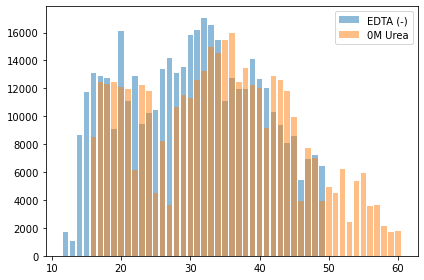

In [40]:
plt.bar(range(12,50), EDTA_minus_df.sum().values, alpha=0.5, label="EDTA (-)")
#plt.bar(range(10, 71), RNA_diff_cntrl_1_df.sum().values,  alpha=0.5, label="RNA1 (-)")
#plt.bar(range(13, 72), trimmed_phospho1_df.sum().values,  alpha=0.5, label="Phos1 (-)")
plt.bar(range(16, 61), urea_0M_df.sum().values,  alpha=0.5, label="0M Urea")
plt.legend()

Starting to feel generally good about the PSM amounts we are seeing;
we are also seeing good examples of complexes we already know well, with the exception of the proteasome looking
a little funky... 

Furthermore, as long as we have some nice examples where the sizes are matching up and our positive controls look appropriate in the traces, we can feel good about these proteins being ID'd

In [41]:
#sfisch6: creating a dictionary of all PSMs >= 10 across each control replicate
total_confident_unique_prots_dict = {"EDTA (-)": len(EDTA_minus_df[EDTA_minus_df.sum(axis=1)>=10]), 
                                     "Urea 0M": len(urea_0M_df[urea_0M_df.sum(axis=1)>=10]), 
                                     "Phospho_1": len(trimmed_phospho1_df[trimmed_phospho1_df.sum(axis=1) >= 10]), 
                                     "Phospho_2": len(trimmed_phos2_df[trimmed_phos2_df.sum(axis=1) >= 10]), 
                                     "Phospho_3": len(trimmed_phos3_df[trimmed_phos3_df.sum(axis=1) >= 10]), 
                                     "RNA_1": len(RNA_diff_cntrl_1_df[RNA_diff_cntrl_1_df.sum(axis=1) >= 10]), 
                                     "RNA_2": len(RNA_diff_cntrl_2_df[RNA_diff_cntrl_2_df.sum(axis=1) >= 10])}
print(total_confident_unique_prots_dict)

{'EDTA (-)': 3592, 'Urea 0M': 3838, 'Phospho_1': 3002, 'Phospho_2': 3789, 'Phospho_3': 5723, 'RNA_1': 4768, 'RNA_2': 5179}


In [42]:
#sfisch6: Creating a dataframe from that dictionary
total_unique_proteins_df = pd.DataFrame.from_dict(data=total_confident_unique_prots_dict, 
                                                  columns=['Total_PSM_Count'], orient='index' )

In [43]:
total_unique_proteins_df

,Total_PSM_Count
EDTA (-),3592
Urea 0M,3838
Phospho_1,3002
Phospho_2,3789
Phospho_3,5723
RNA_1,4768
RNA_2,5179


In [44]:
#sfisch6: Changing the orientation of DF
total_unique_grtr_10_prots_dict = {
    "Control_Replicate": ["EDTA (-)", "Urea 0M", "Phospho_1", "Phospho_2", "Phospho_3", "RNA_1", "RNA_2"], 
    "Total_Unique_Proteins": [3592, 3838, 3002, 3789, 5723, 4768, 5179]}
grtr_than_10_total_prots_df = pd.DataFrame(data=total_unique_grtr_10_prots_dict, 
                                           columns=["Control_Replicate", "Total_Unique_Proteins"])

In [45]:
grtr_than_10_total_prots_df

,Control_Replicate,Total_Unique_Proteins
0,EDTA (-),3592
1,Urea 0M,3838
2,Phospho_1,3002
3,Phospho_2,3789
4,Phospho_3,5723
5,RNA_1,4768
6,RNA_2,5179


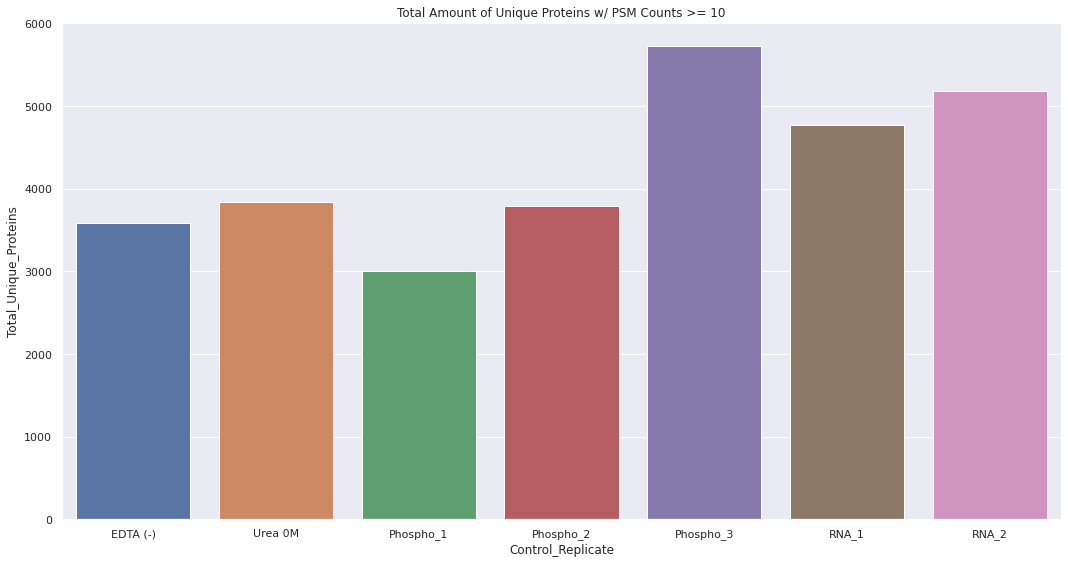

In [46]:
#sfisch6: Bar graph to better visualize this comparison
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x="Control_Replicate", 
                 y="Total_Unique_Proteins", 
                 data=grtr_than_10_total_prots_df).set(title='Total Amount of Unique Proteins w/ PSM Counts >= 10')

In [47]:
#sfisch6: comparing this trend at different PSM thresholds
total_prots_grtr_1 = {"control_replicates": ["EDTA (-)", "Urea 0M", "Phospho_1",
                                             "Phospho_2","Phospho_3","RNA_1", "RNA_2"], 
                      "total_unique_proteins": 
                      [len(EDTA_minus_df[EDTA_minus_df.sum(axis=1)> 1]),
                       len(urea_0M_df[urea_0M_df.sum(axis=1)>1]), 
                       len(trimmed_phospho1_df[trimmed_phospho1_df.sum(axis=1) >1]), 
                       len(trimmed_phos2_df[trimmed_phos2_df.sum(axis=1) > 1]), 
                       len(trimmed_phos3_df[trimmed_phos3_df.sum(axis=1) > 1]), 
                       len(RNA_diff_cntrl_1_df[RNA_diff_cntrl_1_df.sum(axis=1) >1]), 
                       len(RNA_diff_cntrl_2_df[RNA_diff_cntrl_2_df.sum(axis=1) > 1])]}

tot_prot_at_least_2PSMs_df = pd.DataFrame(data=total_prots_grtr_1,
                                          columns=['control_replicates', 'total_unique_proteins'])

In [48]:
tot_prot_at_least_2PSMs_df

,control_replicates,total_unique_proteins
0,EDTA (-),8267
1,Urea 0M,7696
2,Phospho_1,8082
3,Phospho_2,8914
4,Phospho_3,12191
5,RNA_1,7398
6,RNA_2,11625


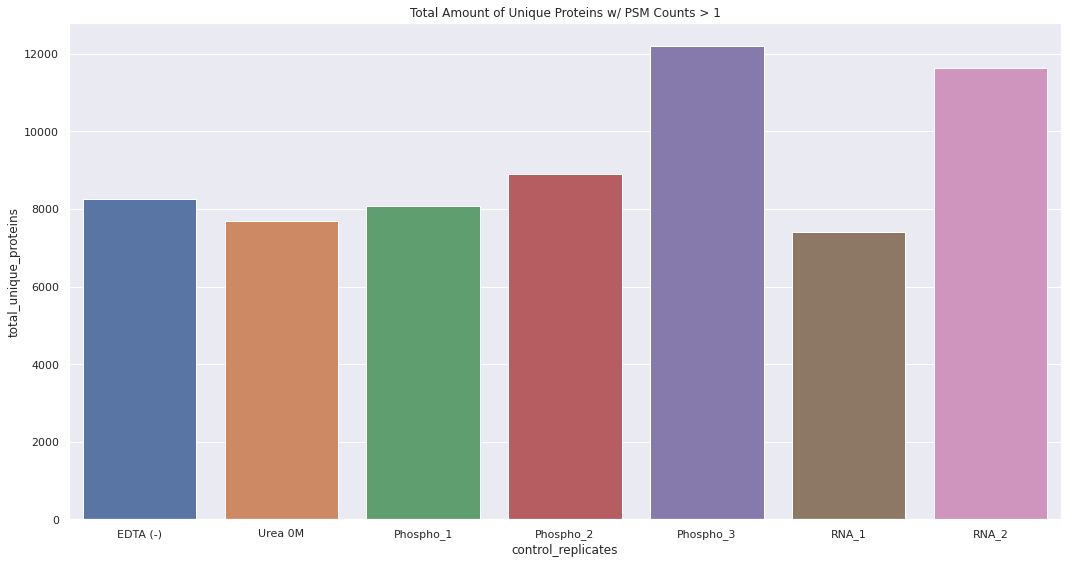

In [49]:
sns.set(rc = {'figure.figsize':(15,8)})
ax1 = sns.barplot(x="control_replicates", y="total_unique_proteins", data=tot_prot_at_least_2PSMs_df).set(title='Total Amount of Unique Proteins w/ PSM Counts > 1')

In [50]:
total_prots_grtr_99 = {"control_replicates": ["EDTA (-)", "Urea 0M", "Phospho_1",
                                             "Phospho_2","Phospho_3","RNA_1", "RNA_2"], 
                      "total_unique_proteins": 
                      [len(EDTA_minus_df[EDTA_minus_df.sum(axis=1)> 99]),
                       len(urea_0M_df[urea_0M_df.sum(axis=1)>99]), 
                       len(trimmed_phospho1_df[trimmed_phospho1_df.sum(axis=1) >99]), 
                       len(trimmed_phos2_df[trimmed_phos2_df.sum(axis=1) > 99]), 
                       len(trimmed_phos3_df[trimmed_phos3_df.sum(axis=1) > 99]), 
                       len(RNA_diff_cntrl_1_df[RNA_diff_cntrl_1_df.sum(axis=1) >99]), 
                       len(RNA_diff_cntrl_2_df[RNA_diff_cntrl_2_df.sum(axis=1) > 99])]}

tot_prot_at_least_100_PSMs_df = pd.DataFrame(data=total_prots_grtr_99,
                                          columns=['control_replicates', 'total_unique_proteins'])

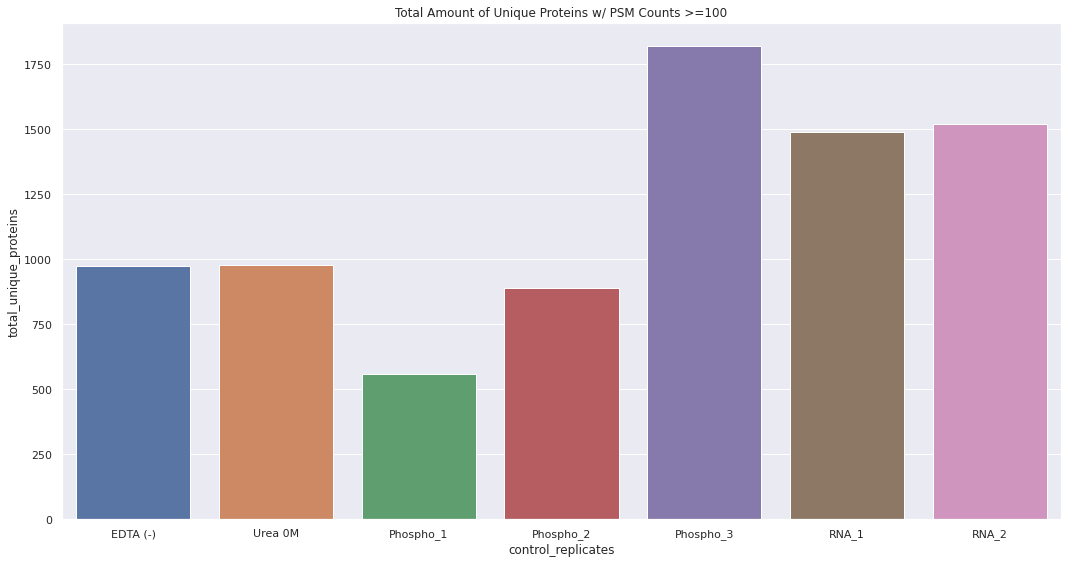

In [51]:
sns.set(rc = {'figure.figsize':(15,8)})
ax2 = sns.barplot(x="control_replicates", y="total_unique_proteins", 
                  data=tot_prot_at_least_100_PSMs_df).set(title='Total Amount of Unique Proteins w/ PSM Counts >=100')

In [52]:
total_prots_grtr_4 = {"control_replicates": ["EDTA (-)", "Urea 0M", "Phospho_1",
                                             "Phospho_2","Phospho_3","RNA_1", "RNA_2"], 
                      "total_unique_proteins": 
                      [len(EDTA_minus_df[EDTA_minus_df.sum(axis=1)> 4]),
                       len(urea_0M_df[urea_0M_df.sum(axis=1)>4]), 
                       len(trimmed_phospho1_df[trimmed_phospho1_df.sum(axis=1) >4]), 
                       len(trimmed_phos2_df[trimmed_phos2_df.sum(axis=1) > 4]), 
                       len(trimmed_phos3_df[trimmed_phos3_df.sum(axis=1) > 4]), 
                       len(RNA_diff_cntrl_1_df[RNA_diff_cntrl_1_df.sum(axis=1) > 4]), 
                       len(RNA_diff_cntrl_2_df[RNA_diff_cntrl_2_df.sum(axis=1) > 4])]}

tot_prot_at_least_5_PSMs_df = pd.DataFrame(data=total_prots_grtr_4,
                                          columns=['control_replicates', 'total_unique_proteins'])

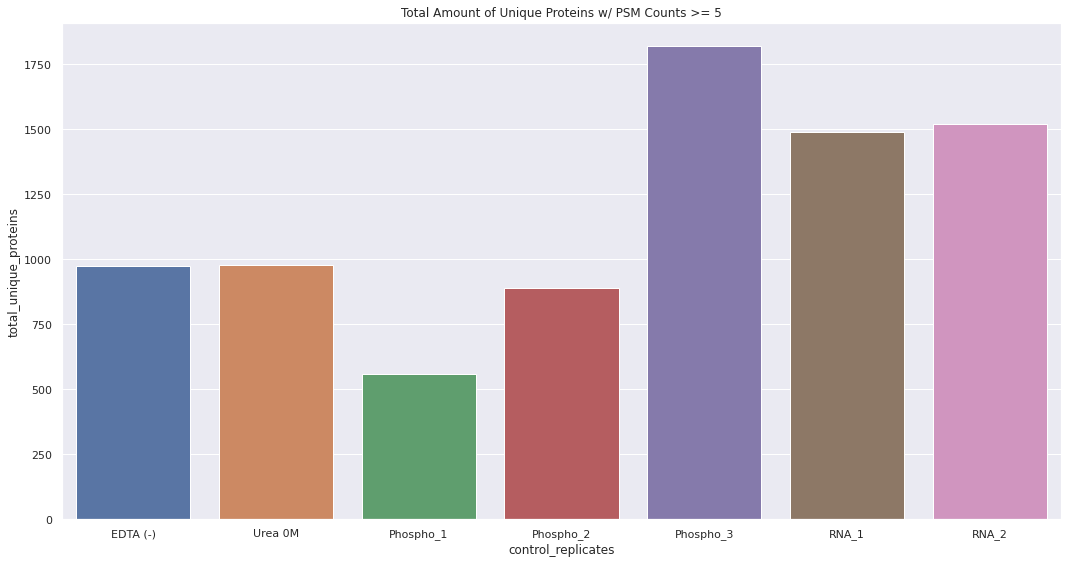

In [53]:
sns.set(rc = {'figure.figsize':(15,8)})
ax3 = sns.barplot(x="control_replicates", y="total_unique_proteins", 
                  data=tot_prot_at_least_100_PSMs_df).set(title='Total Amount of Unique Proteins w/ PSM Counts >= 5')

How consistent the number of total unique proteins is makes me feel good about the EDTA (-) control; particularly
when considering the fact that we looked at less fractions than the urea diffrac and we have comparable (sometimes
more) amounts of unique proteins. 

In [1]:
#sfisch6: Looking at EIF2 Complex in other replicates

#EIF2_IDs = ['P05198', 'P12956', 'P13010', 'P20042', 'P41091', 'P78527', 'Q12905', 'Q12906']
EIF2_IDs= ['P05198']

In [2]:
#sfisch6: Plotting sparklines

fig, axs = plt.subplots(len(EIF2_IDs))
for i,ID in enumerate(EIF2_IDs):
    axs[i].plot(range(16,61), urea_0M_df.loc[ID].values, label='EIF_2_Complex')

NameError: name 'plt' is not defined

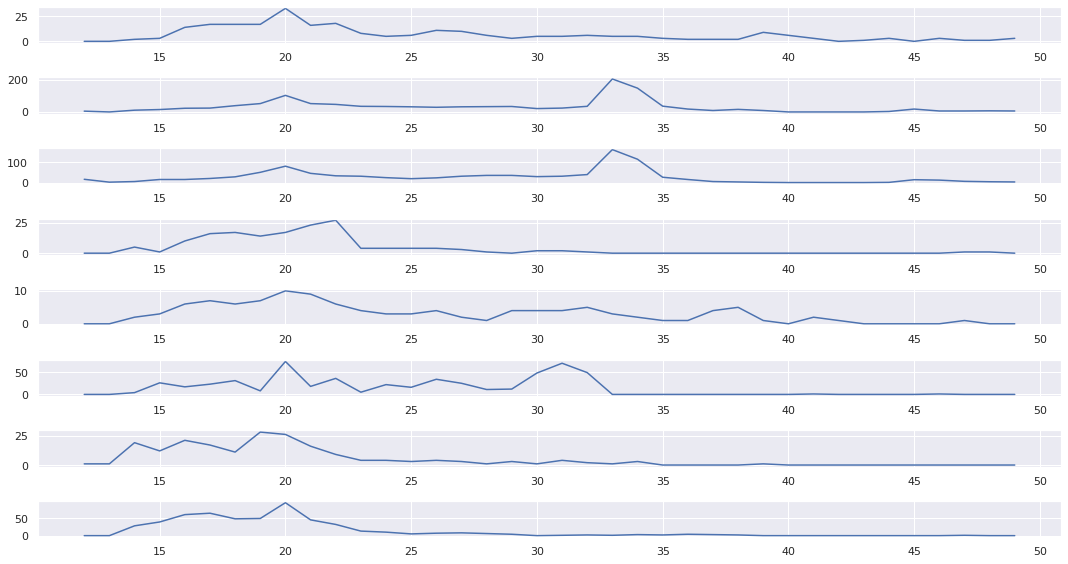

In [58]:
fig, axs = plt.subplots(len(EIF2_IDs))
for i,ID in enumerate(EIF2_IDs):
    axs[i].plot(range(12,50), EDTA_minus_df.loc[ID].values, label='EIF_2_Complex')

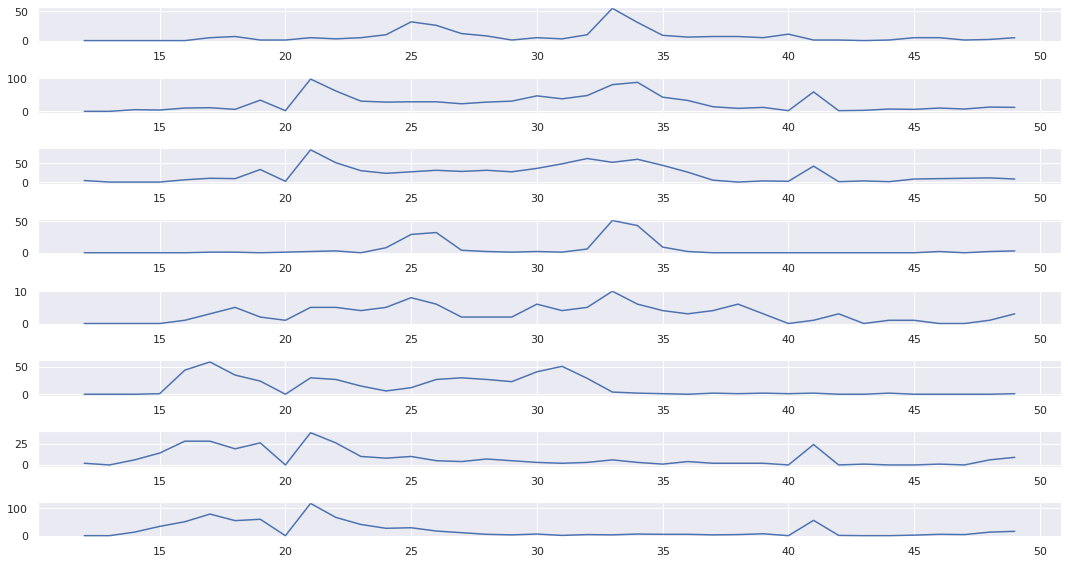

In [59]:
fig, axs = plt.subplots(len(EIF2_IDs))
for i,ID in enumerate(EIF2_IDs):
    axs[i].plot(range(12,50), EDTA_plus_df.loc[ID].values, label='EIF_2_Complex')

In [62]:
new_df = urea_0M_df[urea_0M_df.sum(axis=1)>1]

In [63]:
len(new_df)

7696